In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from utils import test_model, test_model_bootstrap
from utils import test_khorana, test_khorana_bootstrap

In [2]:
SEED = 1997 # for reproducibility

### Loading the data

In [3]:
# reading the data
path = 'data/'
data = pd.read_csv(path + 'data_TiC_Onco.csv')
data.shape

(391, 12)

In [4]:
data.head()

,id,bmi,Family,estadiGrup,khorana,tipusTumor_HR,tipusTumor_VHR,rs2232698,rs6025,rs5985,rs4524,VTE
0,1,1,0,1,2.0,0,0,0,0,1,1,1
1,14,0,0,0,2.0,0,1,0,0,0,1,0
2,67,0,0,1,1.0,1,0,0,0,0,2,0
3,91,0,0,1,0.0,0,0,0,0,0,2,0
4,68,1,0,1,0.0,0,0,0,0,0,2,1


In [5]:
# create X,y sets
X = data[data.columns.difference(['id','VTE','khorana'])]
y = data['VTE']
khorana = data['khorana']

X.shape, y.shape

((391, 9), (391,))

### Logistic Regression model

In [6]:
lr = LogisticRegression(solver='liblinear', random_state=SEED)

### Validating results

- Bootstrap approach (paper)

In [7]:
test_model_bootstrap(lr, X, y)

,score,mean,95% CI
0,AUC,0.75,"(0.7,0.81)"
1,accuracy,0.75,"(0.72,0.78)"
2,sensitivity,0.53,"(0.39,0.67)"
3,specificity,0.80,"(0.79,0.82)"
4,PPV,0.38,"(0.3,0.46)"
5,NPV,0.88,"(0.84,0.92)"


- Our approach (10-fold cross-validation)

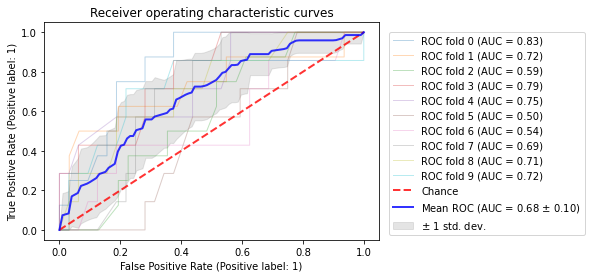

,score,mean,95% CI
0,AUC,0.68,"(0.48,0.89)"
1,accuracy,0.71,"(0.61,0.81)"
2,sensitivity,0.34,"(0,0.71)"
3,specificity,0.80,"(0.73,0.86)"
4,PPV,0.27,"(0.01,0.52)"
5,NPV,0.84,"(0.76,0.92)"


In [8]:
test_model(lr, X, y)

### Khorana score

In [9]:
test_khorana(khorana, y)

AUC:  52.68
Accuracy (%): 71.1
Sensivity (%): 23.29
Specificity (%): 82.08
PPV (%): 22.97
NPV (%): 82.33


In [10]:
test_khorana_bootstrap(khorana, y)

,score,mean,95% CI
0,AUC,0.53,"(0.49,0.57)"
1,accuracy,0.71,"(0.67,0.75)"
2,sensitivity,0.24,"(0.16,0.32)"
3,specificity,0.82,"(0.78,0.86)"
4,PPV,0.24,"(0.16,0.31)"
5,NPV,0.82,"(0.78,0.86)"
